In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('column_2C_weka.csv')
print(plt.style.available) # look at available plot styles
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [5]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


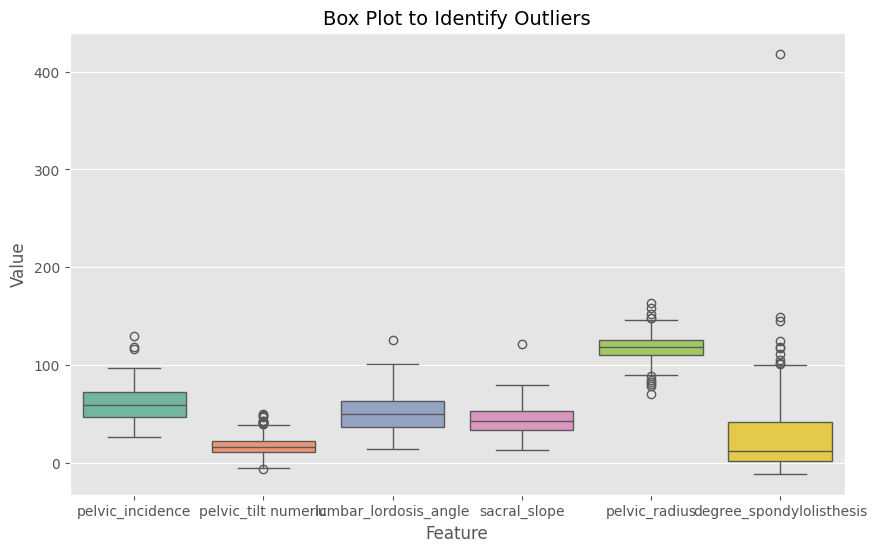

In [6]:
melted_data = data.melt(id_vars="class", var_name="Feature", value_name="Value")

# Create box plots for each feature
plt.figure(figsize=(10, 6))
sns.boxplot(x="Feature", y="Value", data=melted_data, palette="Set2")

# Add a title
plt.title("Box Plot to Identify Outliers", fontsize=14)
plt.show()

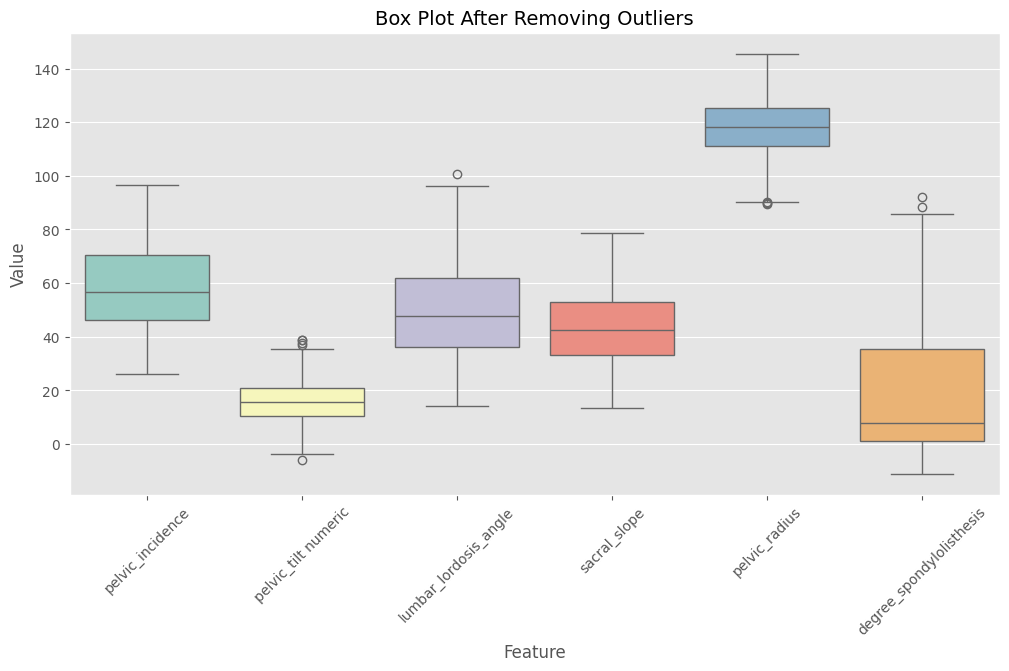

In [7]:
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)  # First quartile
        Q3 = df[column].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR  # Lower bound
        upper_bound = Q3 + 1.5 * IQR  # Upper bound
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Only select numeric columns for outlier detection
columns_to_check = [
    'pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
    'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'
]

# Remove outliers
cleaned_data = remove_outliers_iqr(data, columns_to_check)

# Visualize the cleaned data with boxplot (excluding 'class')
melted_cleaned_data = cleaned_data.melt(id_vars="class", var_name="Feature", value_name="Value")
plt.figure(figsize=(12, 6))
sns.boxplot(x="Feature", y="Value", data=melted_cleaned_data, palette="Set3")
plt.title("Box Plot After Removing Outliers", fontsize=14)
plt.xticks(rotation=45)
plt.show()

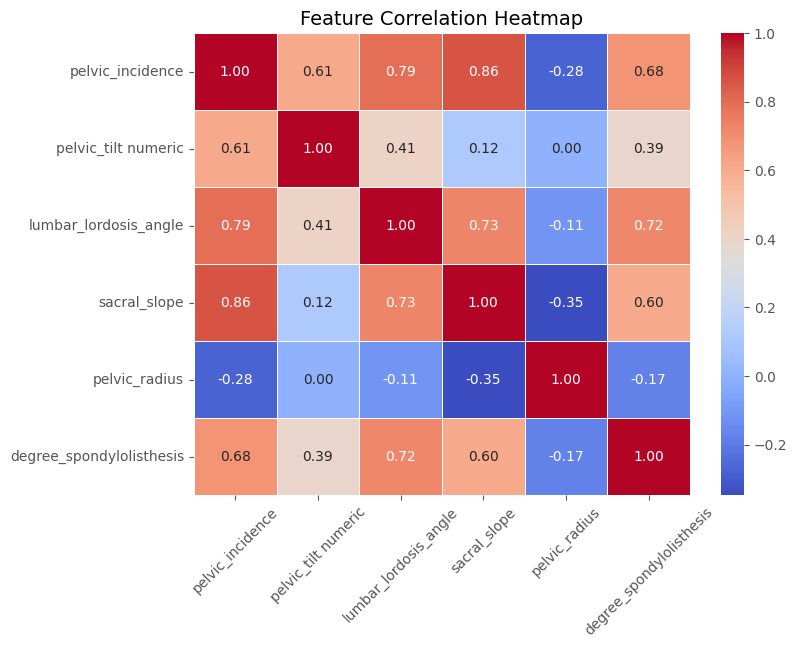

In [8]:
correlation_matrix = cleaned_data.drop('class', axis=1).corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix, 
    annot=True,  # Display correlation coefficients
    cmap="coolwarm",  # Color map for better visualization
    fmt=".2f",  # Format for annotations
    linewidths=0.5
)

# Add a title for clarity
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.xticks(rotation=45)
plt.show()

class
Abnormal    210
Normal      100
Name: count, dtype: int64

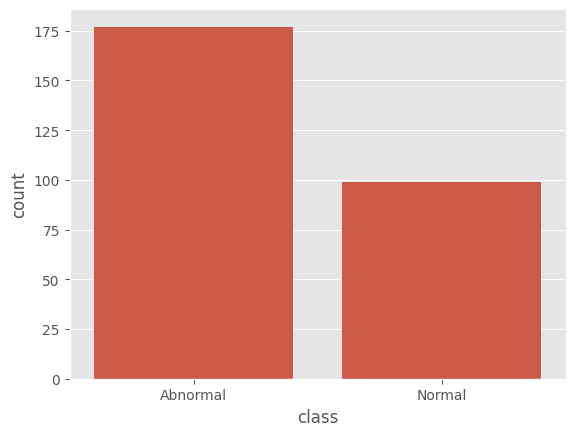

In [9]:
sns.countplot(x="class", data=cleaned_data)
data.loc[:,'class'].value_counts()

## KNeighbor Classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier #Output is Non-Linear
from sklearn.model_selection import train_test_split
x,y = cleaned_data.loc[:,cleaned_data.columns != 'class'], cleaned_data.loc[:,'class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=1) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=1) accuracy is:  0.8674698795180723


In [50]:
knn.predict([[63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400]])

array(['Abnormal'], dtype=object)

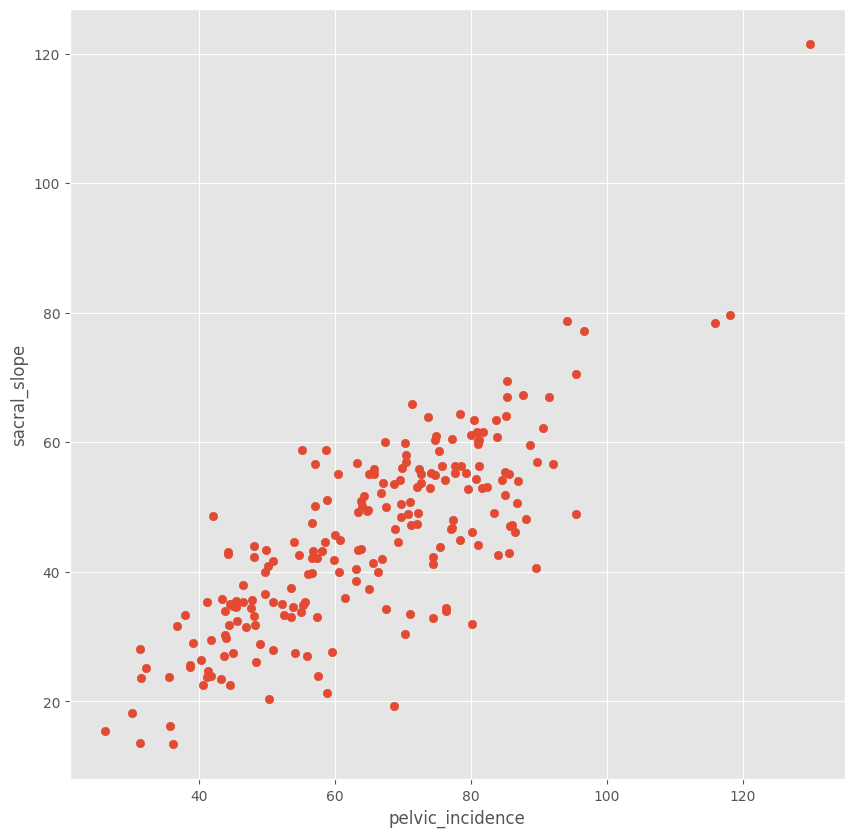

In [12]:
# create data1 that includes pelvic_incidence that is feature and sacral_slope that is target variable
data1 = data[data['class'] =='Abnormal']
x = np.array(data1.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:,'sacral_slope']).reshape(-1,1)
# Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

## Linear Regression

R^2 score:  0.6458410481075871


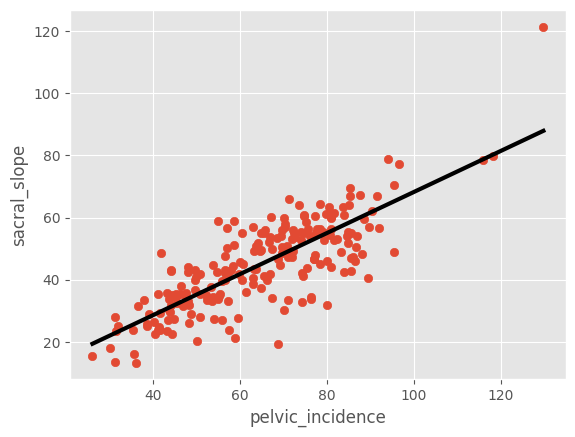

In [13]:
# LinearRegression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# Predict space
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
# Fit
reg.fit(x,y)
# Predict
predicted = reg.predict(predict_space)
# R^2 
print('R^2 score: ',reg.score(x, y))
# Plot regression line and scatter
plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

## Cross Validation

In [14]:
# CV
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 5
cv_result = cross_val_score(reg,x,y,cv=k) 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.32924233 0.61683991 0.53117056 0.1954798  0.29299864]
CV scores average:  0.3931462502884869


## Lasso

In [15]:
from sklearn.linear_model import Lasso
data1 = data[data['class'] =='Abnormal']
x = np.array(data1.loc[:,['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','pelvic_radius'] ])
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.1)
lasso.fit(x_train,y_train)
ridge_predict = lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test,y_test))

Lasso score:  0.9999985469460118
Lasso coefficients:  [ 9.98901381e-01 -9.98137804e-01  3.13359061e-05 -0.00000000e+00]


## Random Forest

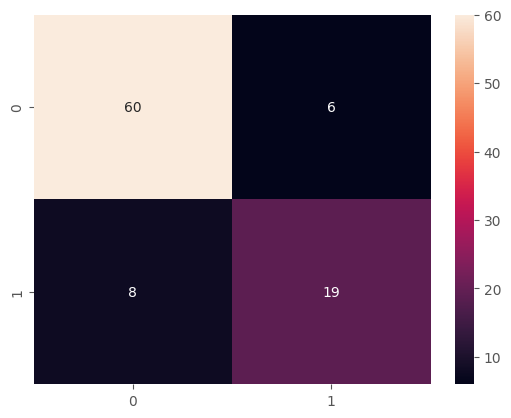

In [16]:
# Confusion matrix with random forest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
rf.score
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)

# visualize with seaborn library
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

# Applying SVM

In [17]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42) 
svm.fit(x_train, y_train) 
svm_predictions = svm.predict(x_test)  

svm_accuracy = svm.score(x_test, y_test)  
print('SVM Accuracy:', svm_accuracy)



SVM Accuracy: 0.8709677419354839


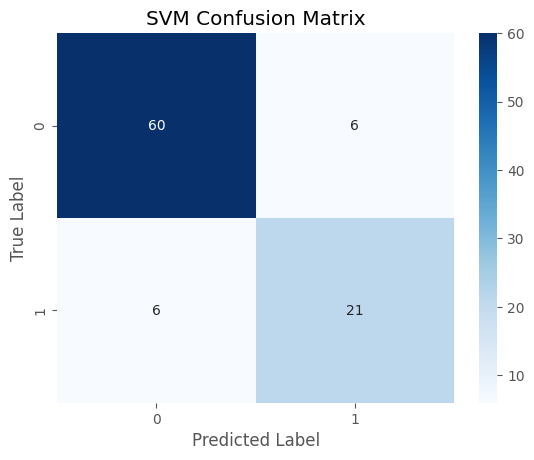

In [18]:
svm_cm = confusion_matrix(y_test, svm_predictions)

sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Voting Method

In [19]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

log_clf = LogisticRegression(random_state=42)
svc_clf = SVC(kernel='linear', probability=True, random_state=42)  # probability=True for soft voting
knn_clf = KNeighborsClassifier()

In [20]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('svc', svc_clf), ('knn', knn_clf)],
    voting='soft'  # 'hard' for majority voting, 'soft' for weighted probabilities
)

voting_clf.fit(x_train, y_train)

voting_accuracy = voting_clf.score(x_test, y_test)
print('Voting Classifier Accuracy:', voting_accuracy)

Voting Classifier Accuracy: 0.8709677419354839


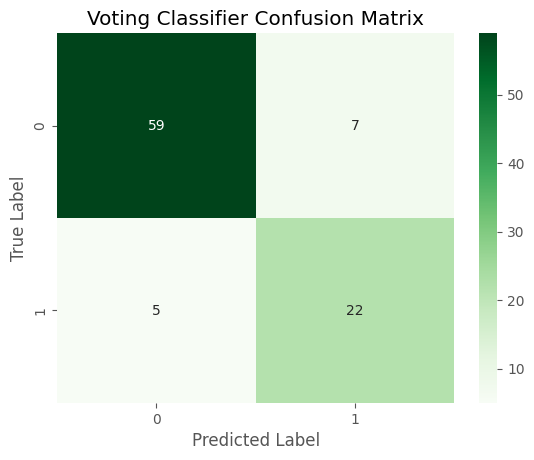

In [21]:
voting_predictions = voting_clf.predict(x_test)
voting_cm = confusion_matrix(y_test, voting_predictions)

sns.heatmap(voting_cm, annot=True, fmt="d", cmap="Greens")
plt.title("Voting Classifier Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Stacking

In [22]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

base_learners = [
    ('svc', SVC(kernel='linear', probability=True, random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier(random_state=42))
]

meta_learner = LogisticRegression(random_state=42)

stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5  # 5-fold cross-validation
)

stacking_clf.fit(x_train, y_train)

stacking_accuracy = stacking_clf.score(x_test, y_test)
print('Stacking Classifier Accuracy:', stacking_accuracy)

Stacking Classifier Accuracy: 0.8494623655913979


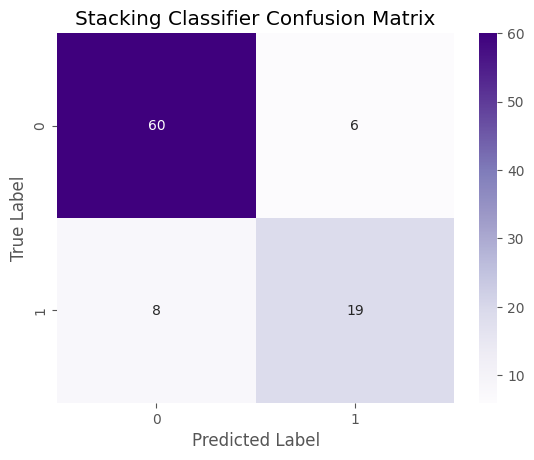

In [23]:
# Predictions and Confusion Matrix
stacking_predictions = stacking_clf.predict(x_test)
stacking_cm = confusion_matrix(y_test, stacking_predictions)

# Visualize the Confusion Matrix
sns.heatmap(stacking_cm, annot=True, fmt="d", cmap="Purples")
plt.title("Stacking Classifier Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Bagging

In [24]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

base_estimator = DecisionTreeClassifier(random_state=42)

bagging_clf = BaggingClassifier(
    n_estimators=50,        # Number of trees in the ensemble
    max_samples=0.8,        # Fraction of the training data to sample
    max_features=0.8,       # Fraction of features to sample
    oob_score=True,
    bootstrap=True,         # Use bootstrap sampling
    random_state=42
)

bagging_clf.fit(x_train, y_train)

bagging_accuracy = bagging_clf.score(x_test, y_test)
print('Bagging Classifier Accuracy:', bagging_accuracy)

Bagging Classifier Accuracy: 0.8387096774193549


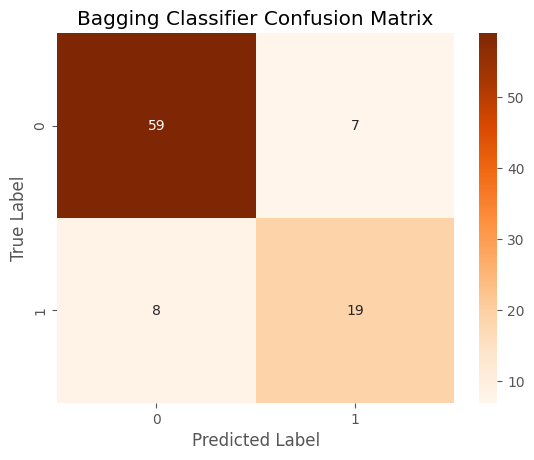

In [25]:
# Predictions and Confusion Matrix
bagging_predictions = bagging_clf.predict(x_test)
bagging_cm = confusion_matrix(y_test, bagging_predictions)

# Visualize the Confusion Matrix
sns.heatmap(bagging_cm, annot=True, fmt="d", cmap="Oranges")
plt.title("Bagging Classifier Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Boosting

In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)  # Weak learner

boosting_clf = AdaBoostClassifier(
    n_estimators=50,  # Number of weak learners
    learning_rate=1.0,  # Step size for weight updates
    random_state=42
)

boosting_clf.fit(x_train, y_train)

boosting_accuracy = boosting_clf.score(x_test, y_test)
print('Boosting Classifier Accuracy:', boosting_accuracy)




Boosting Classifier Accuracy: 0.8387096774193549


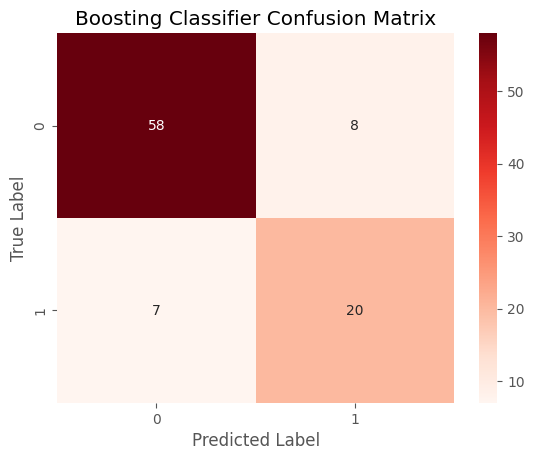

In [27]:
boosting_predictions = boosting_clf.predict(x_test)
boosting_cm = confusion_matrix(y_test, boosting_predictions)

sns.heatmap(boosting_cm, annot=True, fmt="d", cmap="Reds")
plt.title("Boosting Classifier Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## CNN

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

# Prepare the data
x = cleaned_data.loc[:, cleaned_data.columns != 'class'].values
y = cleaned_data['class'].values

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize the data
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Reshape the input for CNN
x = x.reshape(x.shape[0], x.shape[1], 1)  # Adding a channel dimension

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)



In [29]:
# Build the CNN model
model = Sequential([
    Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(x_train.shape[1], 1)),
    Dropout(0.2),
    Conv1D(filters=64, kernel_size=2, activation='relu'),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.3699 - loss: 0.7172 - val_accuracy: 0.5663 - val_loss: 0.6321
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6550 - loss: 0.5881 - val_accuracy: 0.5663 - val_loss: 0.6113
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6802 - loss: 0.5331 - val_accuracy: 0.5663 - val_loss: 0.5923
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6722 - loss: 0.5533 - val_accuracy: 0.6024 - val_loss: 0.5392
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7265 - loss: 0.4644 - val_accuracy: 0.7108 - val_loss: 0.5085
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7372 - loss: 0.5144 - val_accuracy: 0.7952 - val_loss: 0.4698
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7932 - loss: 0.4588 - val_accuracy: 0.8193 - val_loss: 0.4345
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8140 - loss: 0.4628 - val_accuracy: 0.8193 - val_loss: 0.3971


## ANN 

In [32]:
y_data = data1["class"].values
x_data = data1.drop(["class"],axis = 1)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size = 0.2, random_state = 42) 

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library

def build_classifier():
    model = Sequential()
    model.add(Dense(units = 96, kernel_initializer = "uniform",activation = "relu", input_dim = x_train.shape[1]))
    model.add(Dense(units = 48, kernel_initializer = "uniform", activation = "linear"))
    model.add(Dense(units = 1, kernel_initializer = "uniform", activation = "sigmoid"))
    
    model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
    
    return model

classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()

print("Accuracy Mean:"+ str(mean))
print("Accuracy Variance:"+ str(variance))